<a href="https://colab.research.google.com/github/danirmdhn/data-analytics/blob/main/visualisasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Dataset

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [172]:
fdd=pd.read_csv('/content/drive/MyDrive/Dataset/food_delivery_datasets.csv')

# Processing Data

In [173]:
fdd['cust_id']=fdd['cust_id'].map(str)

In [174]:
fdd=fdd[fdd.status=='Cancelled']
fdd.reset_index(drop=True)

order_id  voucher_amount  ...     status  random_id
0    FOOD-10888               0  ...  Cancelled   0.208880
1    FOOD-10394               0  ...  Cancelled   0.640676
2    FOOD-10731               0  ...  Cancelled   0.233675
3    FOOD-10230               0  ...  Cancelled   0.743930
4    FOOD-10584               0  ...  Cancelled   0.840597
..          ...             ...  ...        ...        ...
190  FOOD-10839               0  ...  Cancelled   0.943491
191  FOOD-10229               0  ...  Cancelled   0.483035
192  FOOD-10957               0  ...  Cancelled   0.726522
193  FOOD-10119               0  ...  Cancelled   0.580990
194  FOOD-10459               0  ...  Cancelled   0.668113

[195 rows x 11 columns]

In [175]:
fdd['cancelled_order']=1

In [176]:
fdd=pd.concat([fdd['cust_id'],fdd['status'],fdd['cancelled_order']], axis=1)
fdd.columns=['cust_id','status','cancelled_order']
fdd.head()

cust_id     status  cancelled_order
20  1383625  Cancelled                1
22  1364703  Cancelled                1
29   466885  Cancelled                1
30  1364703  Cancelled                1
34  1351793  Cancelled                1

In [177]:
fdd=fdd.groupby(['cust_id'])
fdd1=fdd[['cancelled_order']].sum()
fdd1.reset_index()

cust_id  cancelled_order
0   1008998                1
1   1010922                2
2    103236                2
3   1045751                2
4   1079631                1
..      ...              ...
80   940042                1
81   943758                2
82   949010                2
83   960065                1
84   979027                1

[85 rows x 2 columns]

In [178]:
fdd=fdd1.sort_values(by='cancelled_order',ascending=False)
fdd.reset_index()

cust_id  cancelled_order
0    361927               14
1    366528                8
2   1364703                7
3    466885                6
4   1472725                6
..      ...              ...
80    22895                1
81   331176                1
82   355305                1
83   357568                1
84   979027                1

[85 rows x 2 columns]

# Visualisasi Data

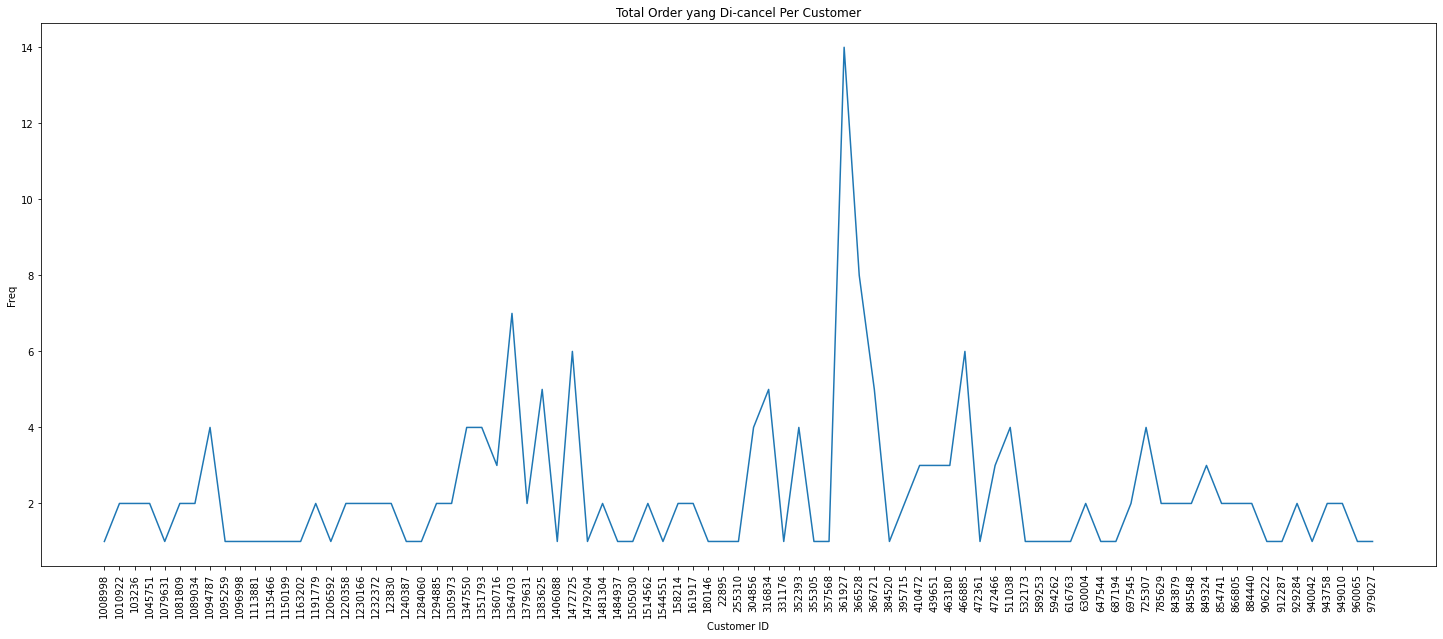

In [181]:
plt.figure(figsize=(25,10))
plt.plot(fdd1)

plt.title('Total Order yang Di-cancel Per Customer')
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.ylabel('Freq')

plt.show()